#AG4 - Actividad Guiada 4
Nombre: Raul Reyero <br>
Link:   https://colab.research.google.com/drive/xxxxxxxxxxxxxxxxxxxxxxxxx <br>
Github: https://github.com/xxxxx/AlgoritmosOptimizacion
<br>


#Carga de librerias

In [1]:

!pip install requests                     #Hacer llamadas http a paginas de la red
!pip install tabulate>=0.9 networkx>=3.0  # Actualiza las librerías 'tabulate' y 'networkx' a version compatibles con tsplib95
                                          # tabulate: Ayuda a crear tablas de texto legibles para presentar datos.
                                          # networkx:  Sirve para trabajar con grafos y redes, y realizar análisis sobre estas estructuras.
!pip install tsplib95 --no-deps           #Modulo para las instancias del problema del TSP

#Carga de los datos del problema

In [2]:
import urllib.request #Hacer llamadas http a paginas de la red
import tsplib95       #Modulo para las instancias del problema del TSP
import math           #Modulo de funciones matematicas. Se usa para exp
import random         #Para generar valores aleatorios

#http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95
#Documentacion :
  # http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp95.pdf
  # https://tsplib95.readthedocs.io/en/stable/pages/usage.html
  # https://tsplib95.readthedocs.io/en/v0.6.1/modules.html
  # https://pypi.org/project/tsplib95/

#Descargamos el fichero de datos(Matriz de distancias)
file = "swiss42.tsp" ;
urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/swiss42.tsp.gz", file + '.gz')
!gzip -d swiss42.tsp.gz     #Descomprimir el fichero de datos

#Coordendas 51-city problem (Christofides/Eilon)
#file = "eil51.tsp" ; urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/eil51.tsp.gz", file)

#Coordenadas - 48 capitals of the US (Padberg/Rinaldi)
#file = "att48.tsp" ; urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/att48.tsp.gz", file)




In [3]:
#Carga de datos y generación de objeto problem
###############################################################################
problem = tsplib95.load(file)

#Nodos
Nodos = list(problem.get_nodes())

#Aristas
Aristas = list(problem.get_edges())


In [4]:
Aristas
# https://github.com/ryanjoneil/tsplib/blob/master/elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/swiss42.tsp

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 21),
 (0, 22),
 (0, 23),
 (0, 24),
 (0, 25),
 (0, 26),
 (0, 27),
 (0, 28),
 (0, 29),
 (0, 30),
 (0, 31),
 (0, 32),
 (0, 33),
 (0, 34),
 (0, 35),
 (0, 36),
 (0, 37),
 (0, 38),
 (0, 39),
 (0, 40),
 (0, 41),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (1, 14),
 (1, 15),
 (1, 16),
 (1, 17),
 (1, 18),
 (1, 19),
 (1, 20),
 (1, 21),
 (1, 22),
 (1, 23),
 (1, 24),
 (1, 25),
 (1, 26),
 (1, 27),
 (1, 28),
 (1, 29),
 (1, 30),
 (1, 31),
 (1, 32),
 (1, 33),
 (1, 34),
 (1, 35),
 (1, 36),
 (1, 37),
 (1, 38),
 (1, 39),
 (1, 40),
 (1, 41),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 11),
 (2, 12),
 (2, 13),
 (2, 14),
 (2, 15),
 (2, 16),
 (2, 17),
 (2, 18),



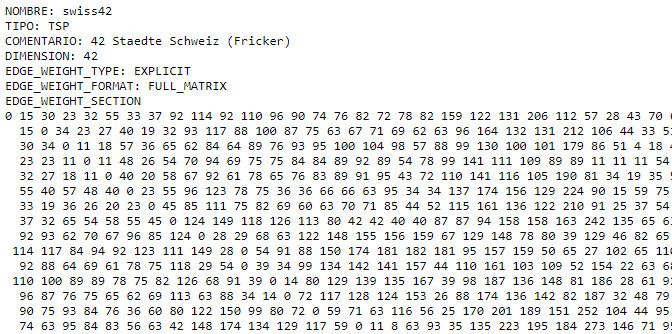

In [5]:
#Probamos algunas funciones del objeto problem

#Distancia entre nodos
problem.get_weight(3, 0)

#Todas las funciones
#Documentación: https://tsplib95.readthedocs.io/en/v0.6.1/modules.html

#dir(problem)

23

#Funciones basicas


In [6]:

#Funciones basicas
###############################################################################

#Se genera una solución aleatoria con comienzo en en el nodo 0
def crear_solucion(Nodos):
  solucion = [Nodos[0]]
  for n in Nodos[1:]:
    solucion = solucion + [random.choice(list(set(Nodos) - set({Nodos[0]}) - set(solucion)))]
  return solucion

#Devuelve la distancia entre dos nodos
def distancia(a,b, problem):
  return problem.get_weight(a,b)

#Devuelve la distancia total de una trayectoria/solución
def distancia_total(solucion, problem):
  distancia_total = 0
  for i in range(len(solucion)-1):
    distancia_total += distancia(solucion[i] ,solucion[i+1] ,  problem)
  return distancia_total + distancia(solucion[len(solucion)-1] ,solucion[0], problem)

sol_temporal = crear_solucion(Nodos)


print(sol_temporal)
print(distancia_total(sol_temporal, problem))

[0, 1, 16, 23, 14, 13, 15, 18, 10, 4, 32, 29, 34, 21, 3, 28, 20, 17, 9, 40, 8, 33, 35, 24, 41, 2, 26, 37, 27, 5, 36, 19, 7, 39, 22, 11, 38, 31, 25, 30, 12, 6]
4502


#BUSQUEDA ALEATORIA

In [7]:
###############################################################################
# BUSQUEDA ALEATORIA
###############################################################################

def busqueda_aleatoria(problem, N):
  #N es el numero de iteraciones
  Nodos = list(problem.get_nodes())

  mejor_solucion = []
  #mejor_distancia = 10e100                         #Inicializamos con un valor alto
  mejor_distancia = float('inf')                    #Inicializamos con un valor alto

  for i in range(N):                                #Criterio de parada: repetir N veces pero podemos incluir otros
    solucion = crear_solucion(Nodos)                #Genera una solucion aleatoria
    distancia = distancia_total(solucion, problem)  #Calcula el valor objetivo(distancia total)

    if distancia < mejor_distancia:                 #Compara con la mejor obtenida hasta ahora
      mejor_solucion = solucion
      mejor_distancia = distancia


  print("Mejor solución:" , mejor_solucion)
  print("Distancia     :" , mejor_distancia)
  return mejor_solucion


#Busqueda aleatoria con 5000 iteraciones
solucion = busqueda_aleatoria(problem, 50000)

Mejor solución: [0, 30, 25, 22, 23, 8, 38, 1, 36, 35, 31, 34, 20, 3, 9, 29, 33, 15, 19, 7, 40, 24, 39, 41, 26, 2, 32, 28, 12, 5, 17, 6, 37, 27, 16, 4, 14, 13, 18, 11, 10, 21]
Distancia     : 3516


#BUSQUEDA LOCAL

In [8]:
###############################################################################
# BUSQUEDA LOCAL(1 paso)
###############################################################################
def genera_vecina(solucion):
  #Generador de soluciones vecinas: 2-opt (intercambiar 2 nodos) Si hay N nodos se generan (N-1)x(N-2)/2 soluciones
  #Se puede modificar para aplicar otros generadores distintos que 2-opt
  #print(solucion)
  mejor_solucion = []
  mejor_distancia = 10e100
  for i in range(1,len(solucion)-1):          #Recorremos todos los nodos en bucle doble para evaluar todos los intercambios 2-opt
    for j in range(i+1, len(solucion)):

      #Se genera una nueva solución intercambiando los dos nodos i,j:
      #  (usamos el operador + que para listas en python las concatena) : ej.: [1,2] + [3] = [1,2,3]
      vecina = solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]

      #Se evalua la nueva solución ...
      distancia_vecina = distancia_total(vecina, problem)

      #... para guardarla si mejora las anteriores
      if distancia_vecina <= mejor_distancia:
        mejor_distancia = distancia_vecina
        mejor_solucion = vecina
  return mejor_solucion


#solucion = [1, 47, 13, 41, 40, 19, 42, 44, 37, 5, 22, 28, 3, 2, 29, 21, 50, 34, 30, 9, 16, 11, 38, 49, 10, 39, 33, 45, 15, 24, 43, 26, 31, 36, 35, 20, 8, 7, 23, 48, 27, 12, 17, 4, 18, 25, 14, 6, 51, 46, 32]
print("Distancia Solucion Incial:" , distancia_total(solucion, problem))


nueva_solucion = genera_vecina(solucion)
print("Distancia Mejor Solucion Local:", distancia_total(nueva_solucion, problem))


Distancia Solucion Incial: 3516
Distancia Mejor Solucion Local: 3271


In [9]:
#Busqueda Local(iteraciones):
#  - Sobre el operador de vecindad 2-opt(funcion genera_vecina)
#  - Sin criterio de parada, se para cuando no es posible mejorar.
def busqueda_local(solucion, problem):
  mejor_solucion = []

  #Generar una solucion inicial de referencia(aleatoria)
  #solucion_referencia = crear_solucion(Nodos)
  solucion_referencia = solucion
  mejor_distancia = distancia_total(solucion_referencia, problem)

  iteracion=0             #Un contador para saber las iteraciones que hacemos
  while(1):
    iteracion +=1         #Incrementamos el contador
    #print('#',iteracion)

    #Obtenemos la mejor vecina ...
    vecina = genera_vecina(solucion_referencia)

    #... y la evaluamos para ver si mejoramos respecto a lo encontrado hasta el momento
    distancia_vecina = distancia_total(vecina, problem)

    #Si no mejoramos hay que terminar. Hemos llegado a un minimo local(según nuestro operador de vencindad 2-opt)
    if distancia_vecina < mejor_distancia:
      #mejor_solucion = copy.deepcopy(vecina)   #Con copia profunda. Las copias en python son por referencia
      mejor_solucion = vecina                   #Guarda la mejor solución encontrada
      mejor_distancia = distancia_vecina

    else:
      print("En la iteracion ", iteracion, ", la mejor solución encontrada es:" , mejor_solucion)
      print("Distancia     :" , mejor_distancia)
      return mejor_solucion

    solucion_referencia = vecina


sol = busqueda_local(nueva_solucion, problem )

En la iteracion  25 , la mejor solución encontrada es: [0, 30, 38, 22, 9, 8, 1, 17, 36, 35, 31, 20, 33, 34, 32, 27, 28, 29, 39, 21, 24, 40, 23, 41, 10, 2, 3, 4, 26, 5, 6, 7, 37, 15, 16, 14, 19, 13, 18, 12, 11, 25]
Distancia     : 1725


#SIMULATED ANNEALING


In [10]:
###############################################################################
# SIMULATED ANNEALING
###############################################################################

#Generador de 1 solucion vecina 2-opt 100% aleatoria (intercambiar 2 nodos)
#Mejorable eligiendo otra forma de elegir una vecina.
def genera_vecina_aleatorio(solucion):

  #Se eligen dos nodos aleatoriamente
  i,j = sorted(random.sample( range(1,len(solucion)) , 2))

  #Devuelve una nueva solución pero intercambiando los dos nodos elegidos al azar
  return solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]


#Funcion de probabilidad para aceptar peores soluciones
def probabilidad(T,d):
  if random.random() <  math.exp( -1*d / T)  :
    return True
  else:
    return False

#Funcion de descenso de temperatura
def bajar_temperatura(T):
  return T*0.99

In [11]:
def recocido_simulado(problem, TEMPERATURA ):
  #problem = datos del problema
  #T = Temperatura

  solucion_referencia = crear_solucion(Nodos)
  distancia_referencia = distancia_total(solucion_referencia, problem)

  mejor_solucion = []             #x* del seudocodigo
  mejor_distancia = 10e100        #F* del seudocodigo


  N=0
  while TEMPERATURA > .0001:
    N+=1
    #Genera una solución vecina
    vecina =genera_vecina_aleatorio(solucion_referencia)

    #Calcula su valor(distancia)
    distancia_vecina = distancia_total(vecina, problem)

    #Si es la mejor solución de todas se guarda(siempre!!!)
    if distancia_vecina < mejor_distancia:
        mejor_solucion = vecina
        mejor_distancia = distancia_vecina

    #Si la nueva vecina es mejor se cambia
    #Si es peor se cambia según una probabilidad que depende de T y delta(distancia_referencia - distancia_vecina)
    if distancia_vecina < distancia_referencia or probabilidad(TEMPERATURA, abs(distancia_referencia - distancia_vecina) ) :
      #solucion_referencia = copy.deepcopy(vecina)
      solucion_referencia = vecina
      distancia_referencia = distancia_vecina

    #Bajamos la temperatura
    TEMPERATURA = bajar_temperatura(TEMPERATURA)

  print("La mejor solución encontrada es " , end="")
  print(mejor_solucion)
  print("con una distancia total de " , end="")
  print(mejor_distancia)
  return mejor_solucion

sol  = recocido_simulado(problem, 10000000)

La mejor solución encontrada es [0, 1, 10, 40, 24, 21, 9, 23, 41, 25, 13, 37, 36, 35, 28, 29, 30, 38, 22, 39, 8, 18, 5, 19, 15, 16, 14, 17, 31, 20, 33, 34, 32, 7, 6, 26, 12, 11, 3, 4, 27, 2]
con una distancia total de 1978


In [12]:
# PABLO Optimización del Problema del Viajero (TSP) con Algoritmos Genéticos y Metaheurísticas
import tsplib95
import random
import numpy as np
import math
import urllib.request

# 📌 Cargar el problema desde TSPLIB95
"""file = "swiss42.tsp"
urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/swiss42.tsp.gz", file + '.gz')
!gzip -d swiss42.tsp.gz  # Descomprime el archivo

problem = tsplib95.load(file)
Nodos = list(problem.get_nodes())
"""
# 📌 Funciones auxiliares para TSP
def distancia(a, b, problem):
    """Devuelve la distancia entre dos nodos"""
    return problem.get_weight(a, b)

def distancia_total(solucion, problem):
    """Calcula la distancia total de una solución"""
    distancia_total = sum(distancia(solucion[i], solucion[i+1], problem) for i in range(len(solucion)-1))
    return distancia_total + distancia(solucion[-1], solucion[0], problem)  # Regreso al inicio

In [13]:
# 📌 Generar una solución aleatoria
def crear_solucion(Nodos):
    """Genera una solución aleatoria para el TSP"""
    solucion = Nodos[:]
    random.shuffle(solucion)
    return solucion

# 📌 Selección de padres (Torneo)
def seleccionar_padres(poblacion, problem, torneo_size=3):
    """Selecciona padres por torneo"""
    seleccionados = random.sample(poblacion, torneo_size)
    return min(seleccionados, key=lambda x: distancia_total(x, problem))

# 📌 Cruce de orden (OX)
def cruce(padre1, padre2):
    """Cruce de orden (OX) para TSP"""
    tamaño = len(padre1)
    p1, p2 = sorted(random.sample(range(tamaño), 2))  # Dos puntos de corte

    hijo = [None] * tamaño
    hijo[p1:p2] = padre1[p1:p2]

    restante = [ciudad for ciudad in padre2 if ciudad not in hijo]
    idx = 0
    for i in range(tamaño):
        if hijo[i] is None:
            hijo[i] = restante[idx]
            idx += 1
    return hijo

# 📌 Mutación por intercambio
def mutar(solucion, tasa_mutacion=0.1):
    """Intercambia dos ciudades con cierta probabilidad"""
    if random.random() < tasa_mutacion:
        i, j = random.sample(range(len(solucion)), 2)
        solucion[i], solucion[j] = solucion[j], solucion[i]
    return solucion

# 📌 Algoritmo Genético
def algoritmo_genetico(problem, num_generaciones=200, tam_poblacion=100, tasa_mutacion=0.2):
    """Optimiza el TSP con Algoritmo Genético"""
    poblacion = [crear_solucion(Nodos) for _ in range(tam_poblacion)]

    for _ in range(num_generaciones):
        nueva_poblacion = []
        for _ in range(tam_poblacion // 2):
            padre1 = seleccionar_padres(poblacion, problem)
            padre2 = seleccionar_padres(poblacion, problem)
            hijo1, hijo2 = cruce(padre1, padre2), cruce(padre2, padre1)
            nueva_poblacion.extend([mutar(hijo1, tasa_mutacion), mutar(hijo2, tasa_mutacion)])

        poblacion = sorted(nueva_poblacion, key=lambda x: distancia_total(x, problem))[:tam_poblacion]

    return poblacion[0]  # Mejor solución encontrada

In [14]:
def recocido_simulado(solucion, problem, temperatura=1000, enfriamiento=0.995, iteraciones=5000):
    """Optimización mediante Recocido Simulado"""
    mejor_solucion = solucion.copy()
    mejor_costo = distancia_total(mejor_solucion, problem)

    for _ in range(iteraciones):
        nueva_solucion = mejor_solucion.copy()
        i, j = random.sample(range(len(nueva_solucion)), 2)
        nueva_solucion[i], nueva_solucion[j] = nueva_solucion[j], nueva_solucion[i]

        nuevo_costo = distancia_total(nueva_solucion, problem)
        delta = nuevo_costo - mejor_costo

        if delta < 0 or random.random() < math.exp(-delta / temperatura):
            mejor_solucion, mejor_costo = nueva_solucion.copy(), nuevo_costo

        temperatura *= enfriamiento  # Reducir la temperatura

    return mejor_solucion, mejor_costo

In [15]:
# 📌 Ejecutamos Algoritmo Genético
sol_genetica = algoritmo_genetico(problem)
print("Solución con Algoritmo Genético:", sol_genetica)
print("Distancia inicial:", distancia_total(sol_genetica, problem))

# 📌 Aplicamos Recocido Simulado para mejorarla
sol_optima, costo_optimo = recocido_simulado(sol_genetica, problem)
print("Solución optimizada con Recocido Simulado:", sol_optima)
print("Distancia optimizada:", costo_optimo)

Solución con Algoritmo Genético: [10, 13, 19, 15, 37, 36, 35, 31, 17, 7, 3, 1, 16, 14, 5, 26, 6, 0, 4, 27, 2, 32, 20, 33, 34, 38, 22, 39, 9, 25, 11, 12, 18, 28, 30, 29, 8, 41, 23, 40, 24, 21]
Distancia inicial: 1738
Solución optimizada con Recocido Simulado: [40, 24, 21, 9, 8, 29, 30, 28, 15, 16, 14, 1, 0, 32, 33, 35, 36, 37, 19, 13, 5, 6, 3, 27, 2, 4, 12, 18, 26, 7, 17, 31, 20, 34, 38, 22, 39, 10, 11, 25, 41, 23]
Distancia optimizada: 1780


In [16]:
def colonia_de_hormigas(problem, num_hormigas=50, iteraciones=100, alfa=1, beta=2, evaporacion=0.5):
    """Optimiza TSP usando Algoritmo de Colonia de Hormigas"""

    num_nodos = len(Nodos)
    feromonas = np.ones((num_nodos, num_nodos))  # Inicializamos las feromonas
    mejor_solucion = None
    mejor_costo = float('inf')

    for _ in range(iteraciones):
        soluciones = []
        costos = []

        for _ in range(num_hormigas):
            nodo_actual = random.choice(Nodos)
            recorrido = [nodo_actual]
            nodos_disponibles = set(Nodos) - {nodo_actual}

            while nodos_disponibles:
                probabilidades = [feromonas[nodo_actual][n]**alfa / distancia(nodo_actual, n, problem)**beta for n in nodos_disponibles]
                probabilidades = np.array(probabilidades) / sum(probabilidades)

                siguiente_nodo = random.choices(list(nodos_disponibles), weights=probabilidades)[0]
                recorrido.append(siguiente_nodo)
                nodos_disponibles.remove(siguiente_nodo)
                nodo_actual = siguiente_nodo

            soluciones.append(recorrido)
            costos.append(distancia_total(recorrido, problem))

        # Actualizamos la mejor solución
        mejor_idx = np.argmin(costos)
        if costos[mejor_idx] < mejor_costo:
            mejor_costo = costos[mejor_idx]
            mejor_solucion = soluciones[mejor_idx]

        # Evaporación de feromonas
        feromonas *= (1 - evaporacion)

        # Reforzamos la mejor ruta encontrada
        for i in range(len(mejor_solucion)-1):
            feromonas[mejor_solucion[i]][mejor_solucion[i+1]] += 1.0 / mejor_costo

    return mejor_solucion, mejor_costo

In [17]:
# 📌 Ejecutamos Algoritmo Genético
sol_genetica = algoritmo_genetico(problem)
print("Solución con Algoritmo Genético:", sol_genetica)
print("Distancia inicial:", distancia_total(sol_genetica, problem))

# 📌 Aplicamos Colonia de Hormigas para mejorarla
sol_optima, costo_optimo = colonia_de_hormigas(problem)
print("Solución optimizada con Colonia de Hormigas:", sol_optima)
print("Distancia optimizada:", costo_optimo)

Solución con Algoritmo Genético: [2, 1, 31, 17, 15, 16, 14, 13, 19, 34, 33, 20, 35, 36, 37, 7, 0, 32, 30, 28, 12, 18, 26, 5, 6, 4, 3, 27, 8, 41, 25, 11, 10, 9, 23, 40, 24, 21, 39, 22, 38, 29]
Distancia inicial: 1758
Solución optimizada con Colonia de Hormigas: [33, 34, 32, 2, 27, 28, 29, 30, 39, 21, 40, 24, 23, 41, 9, 38, 22, 8, 10, 12, 11, 25, 7, 36, 35, 31, 17, 37, 15, 14, 16, 19, 13, 18, 26, 5, 4, 3, 6, 1, 0, 20]
Distancia optimizada: 1664


In [22]:
# 📌 Algoritmo Genético Mejorado
def algoritmo_genetico(problem, num_generaciones=210, tam_poblacion=100, tasa_mutacion=0.3, elitismo=True):
    """Optimiza el TSP con Algoritmo Genético Mejorado"""
    poblacion = [crear_solucion(Nodos) for _ in range(tam_poblacion)]

    for _ in range(num_generaciones):
        nueva_poblacion = []

        # 🔹 **Elitismo**: Guardamos las mejores soluciones sin cambios
        if elitismo:
            elite = sorted(poblacion, key=lambda x: distancia_total(x, problem))[:5]  # Top 5 mejores
            nueva_poblacion.extend(elite)

        for _ in range((tam_poblacion - len(nueva_poblacion)) // 2):
            padre1 = seleccionar_padres(poblacion, problem)
            padre2 = seleccionar_padres(poblacion, problem)
            hijo1, hijo2 = cruce(padre1, padre2), cruce(padre2, padre1)
            nueva_poblacion.extend([mutar(hijo1, tasa_mutacion), mutar(hijo2, tasa_mutacion)])

        poblacion = sorted(nueva_poblacion, key=lambda x: distancia_total(x, problem))[:tam_poblacion]

    return poblacion[0]  # Mejor solución encontrada

In [23]:
# 📌 Ejecutamos Algoritmo Genético Mejorado
sol_genetica_mejorada = algoritmo_genetico(problem)
print("Solución con Algoritmo Genético Mejorado:", sol_genetica_mejorada)
print("Distancia inicial:", distancia_total(sol_genetica_mejorada, problem))

# 📌 Aplicamos Colonia de Hormigas para mejorarla
sol_optima, costo_optimo = colonia_de_hormigas(problem)
print("Solución optimizada con Colonia de Hormigas:", sol_optima)
print("Distancia optimizada:", costo_optimo)

Solución con Algoritmo Genético Mejorado: [27, 0, 16, 14, 15, 37, 36, 35, 20, 33, 34, 32, 31, 17, 7, 1, 3, 28, 29, 30, 38, 22, 39, 21, 24, 40, 9, 23, 41, 8, 10, 25, 11, 12, 18, 26, 13, 19, 5, 6, 4, 2]
Distancia inicial: 1439
Solución optimizada con Colonia de Hormigas: [37, 14, 15, 16, 19, 26, 5, 13, 18, 10, 12, 11, 25, 41, 23, 8, 9, 40, 24, 39, 21, 22, 38, 29, 30, 34, 33, 20, 31, 17, 7, 1, 6, 3, 0, 4, 27, 2, 28, 32, 35, 36]
Distancia optimizada: 1596


In [24]:
import random

def inicializar_poblacion(tamano, Nodos):
    return [crear_solucion(Nodos) for _ in range(tamano)]

def seleccion_torneo(poblacion, fitness, tamano_torneo=5):
    torneo = random.sample(range(len(poblacion)), tamano_torneo)
    return poblacion[min(torneo, key=lambda i: fitness[i])]

def cruce_ordenado(padre1, padre2):
    tamano = len(padre1)
    inicio, fin = sorted(random.sample(range(1, tamano-1), 2))
    hijo = [-1] * tamano
    hijo[inicio:fin] = padre1[inicio:fin]
    j = 0
    for i in range(tamano):
        if hijo[i] == -1:
            while padre2[j] in hijo:
                j += 1
            hijo[i] = padre2[j]
    return hijo

def mutacion(solucion, prob_mutacion=0.1):
    if random.random() < prob_mutacion:
        i, j = random.sample(range(1, len(solucion)-1), 2)
        solucion[i], solucion[j] = solucion[j], solucion[i]
    return solucion

def dos_opt(solucion, problem):
    mejor_solucion = solucion.copy()
    mejor_distancia = distancia_total(solucion, problem)
    improved = True
    while improved:
        improved = False
        for i in range(len(solucion)-2):
            for j in range(i+2, len(solucion)):
                nueva_solucion = solucion.copy()
                nueva_solucion[i+1:j+1] = nueva_solucion[j:i:-1]
                nueva_distancia = distancia_total(nueva_solucion, problem)
                if nueva_distancia < mejor_distancia:
                    mejor_solucion = nueva_solucion
                    mejor_distancia = nueva_distancia
                    improved = True
        if improved:
            solucion = mejor_solucion
    return solucion

def algoritmo_genetico(Nodos, problem, tamano_poblacion=100, generaciones=100):
    poblacion = inicializar_poblacion(tamano_poblacion, Nodos)
    for _ in range(generaciones):
        nueva_poblacion = []
        fitness = [distancia_total(sol, problem) for sol in poblacion]
        for _ in range(tamano_poblacion):
            padre1 = seleccion_torneo(poblacion, fitness)
            padre2 = seleccion_torneo(poblacion, fitness)
            hijo = cruce_ordenado(padre1, padre2)
            hijo = mutacion(hijo)
            hijo = dos_opt(hijo, problem)  # Aplicar 2-opt
            nueva_poblacion.append(hijo)
        poblacion = nueva_poblacion
    mejor_solucion = min(poblacion, key=lambda x: distancia_total(x, problem))
    return mejor_solucion, distancia_total(mejor_solucion, problem)

In [25]:
mejor_distancia_global = float('inf')
mejor_solucion_global = None

for i in range(10):
    print(f"Iteración {i+1}/10")
    solucion, distancia = algoritmo_genetico(Nodos, problem, tamano_poblacion=100, generaciones=100)
    print(f"Distancia en esta iteración: {distancia}")
    if distancia < mejor_distancia_global:
        mejor_distancia_global = distancia
        mejor_solucion_global = solucion

print("Mejor solución final:", mejor_solucion_global)
print("Mejor distancia final:", mejor_distancia_global)

Iteración 1/10


KeyboardInterrupt: 

#Representación en un grafo a partir de la matriz de distancias( Optimización de posiciones usando escalado multidimensional (MDS)



Multidimensional scaling problem(MDS):   https://en.wikipedia.org/wiki/Multidimensional_scaling

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.manifold import MDS  # Multidimensional Scaling o Escalado Multidimensional

def plot_tsp_solution(distance_matrix, tsp_solution):
    """
    Dibuja el grafo de un TSP con las posiciones calculadas mediante MDS y muestra
    solo las aristas correspondientes a la solución del TSP.

    :param distance_matrix: np.ndarray, matriz de distancias entre nodos
    :param tsp_solution: list, lista de nodos en el orden de la solución del TSP
    """
    # Crear el grafo completo
    G = nx.Graph()
    num_nodes = len(distance_matrix)
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            G.add_edge(i, j, weight=distance_matrix[i][j])

    # Usar MDS para calcular posiciones de los nodos
    mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
    positions = mds.fit_transform(distance_matrix)

    # Convertir las posiciones en un diccionario para networkx
    pos = {i: positions[i] for i in range(num_nodes)}

    # Crear un subgrafo con las aristas del camino TSP
    TSP_G = nx.Graph()
    for i in range(len(tsp_solution) - 1):
        u = tsp_solution[i]
        v = tsp_solution[i + 1]
        TSP_G.add_edge(u, v, weight=distance_matrix[u][v])

    # Dibujar el grafo
    plt.figure(figsize=(8, 6))

    # Dibujar nodos
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)

    # Dibujar las aristas del camino TSP
    nx.draw_networkx_edges(TSP_G, pos, edge_color='red', width=2)

    # Añadir etiquetas a los nodos y pesos de las aristas
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
    edge_labels = nx.get_edge_attributes(TSP_G, 'weight')
    nx.draw_networkx_edge_labels(TSP_G, pos, edge_labels=edge_labels, font_size=8)

    plt.title("Grafo TSP con solución específica")
    plt.show()


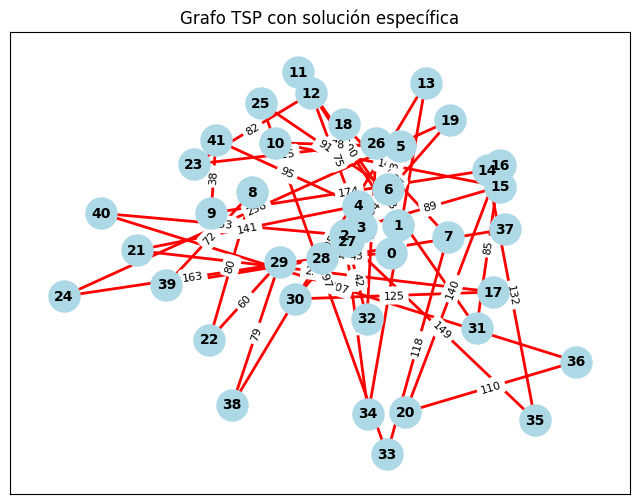

In [ ]:
plot_tsp_solution(problem.edge_weights, crear_solucion(Nodos))

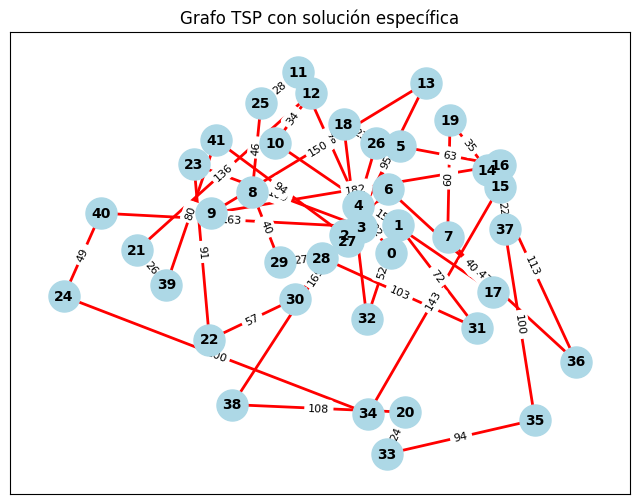

In [ ]:
plot_tsp_solution(problem.edge_weights, solucion)